## Introduction
Before going through the whole process of Exploratory Data Analysis, we will first outline the key steps in EDA to get a better understanding of the project.



### Step 4: Feature Relationship
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons
### Step 5: Asking Question
* Formulate questions about the dataset
* Answer the questions

### Step 0: Imports and Reading Data
Importing all the necessary tools that will be needed in the analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
# Read the Dataset
df_store = pd.read_csv('SampleSuperstore.csv')

### Step 1: Understanding the Data
What does this dataset contains?
* Dataframe `shape`
* `head` and `tail`
* `dtypes` or `info`
* `describe`

In [11]:
# Inspecting what the dataset contains
df_store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [6]:
# Determining the number of rows and columns
dfshape = df_store.shape
print(f'Number of Rows: {dfshape[0]}')
print(f'Number of Columns: {dfshape[1]}')

Number of Rows: 9994
Number of Columns: 13


In [18]:
# Determining the datatypes of each column
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
# Getting the statistical overview of the dataset
df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Step 2: Data Preperation
Clean the data!
* Dropping irrelevant columns and/or rows
* Identifying duplicates
* Renaming
* Feature creation

In [33]:
# Renaming Columns
df_store.rename(columns={'Ship Mode': 'Ship_Mode', 'Postal Code': 'Postal_Code'}, inplace=True)

In [34]:
# Number of duplicates
df_store.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

We found out that there are `17` duplicates in the dataset.

Since there are no unique identifiers (such as codes or shipment dates) to distinguish between duplicate values, we will need to seek insights from other departments to further investigate these duplicates. 

However, for the purposes of our current analysis, we will proceed by removing these duplicate values from the dataset.

In [53]:
df_store = df_store.loc[~df_store.duplicated()].copy()
df_store

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Step 3: Data Analysis
* Univariate or Multivariate Analysis
* Plotting feature distributions
    * Histogram
    * Boxplot

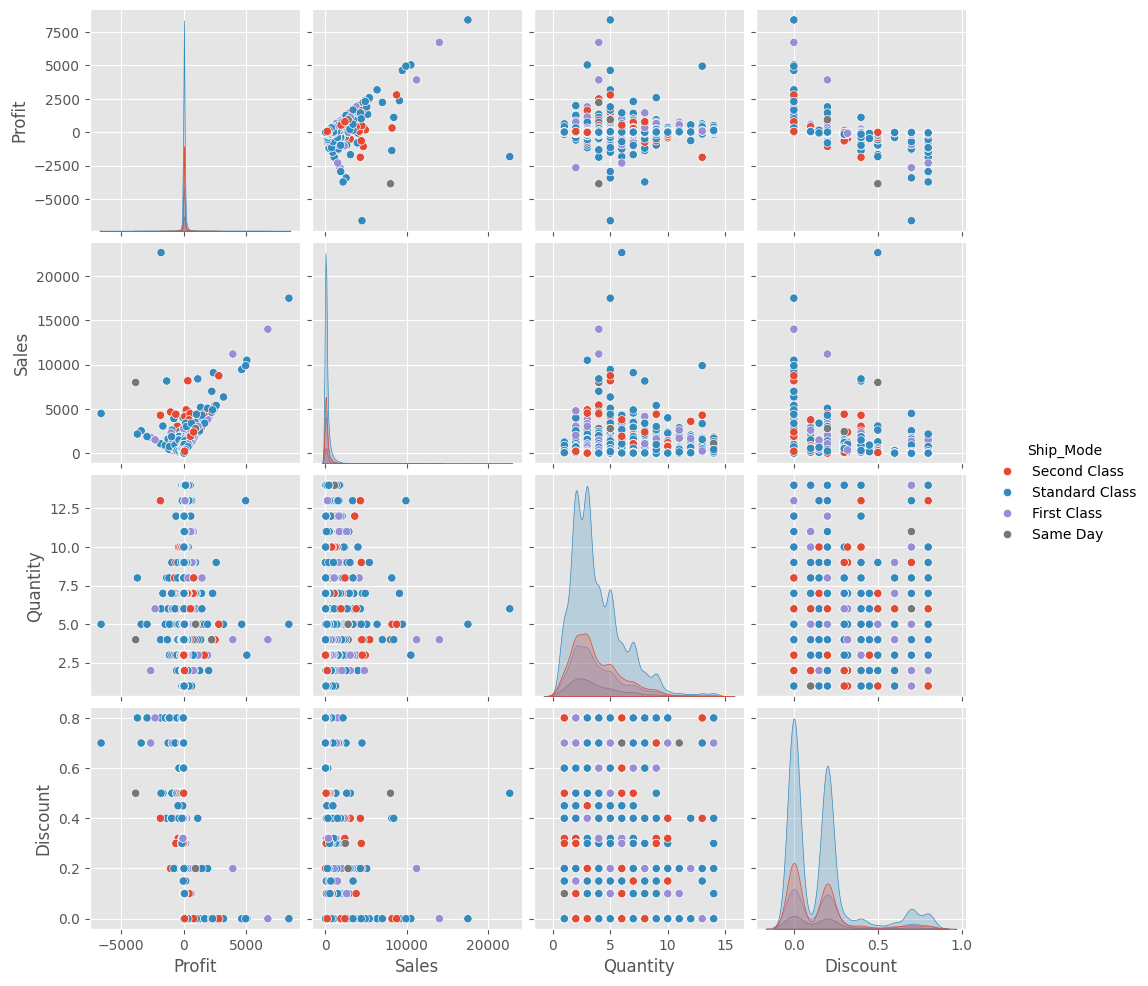

In [131]:
# PairPlot to get an overall view of what we're dealing with
sns.pairplot(df_store, vars=['Profit', 'Sales', 'Quantity', 'Discount'], hue='Ship_Mode')
plt.show()

#### Numerical Analysis

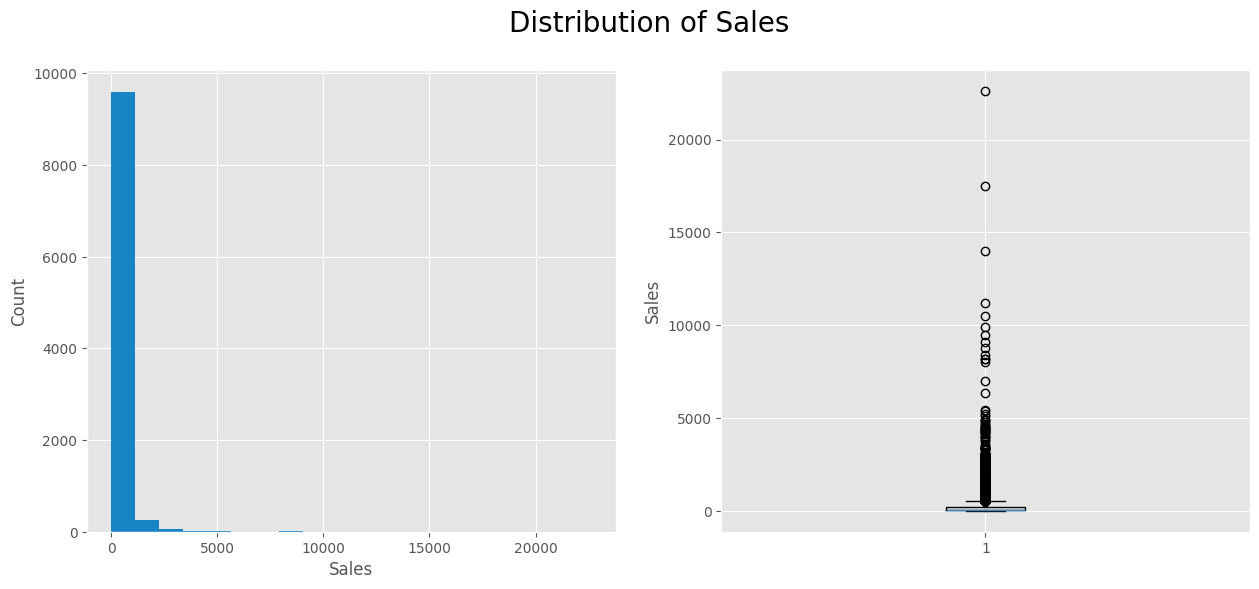

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Blue = #1984c5, Red = #de6e56
ax1.hist(df_store['Sales'], bins=20, color='#1984c5')
ax1.set_ylabel('Count')
ax1.set_xlabel('Sales')

ax2.boxplot(df_store['Sales'])
ax2.set_ylabel('Sales')

plt.suptitle('Distribution of Sales', fontsize=20)
plt.show()

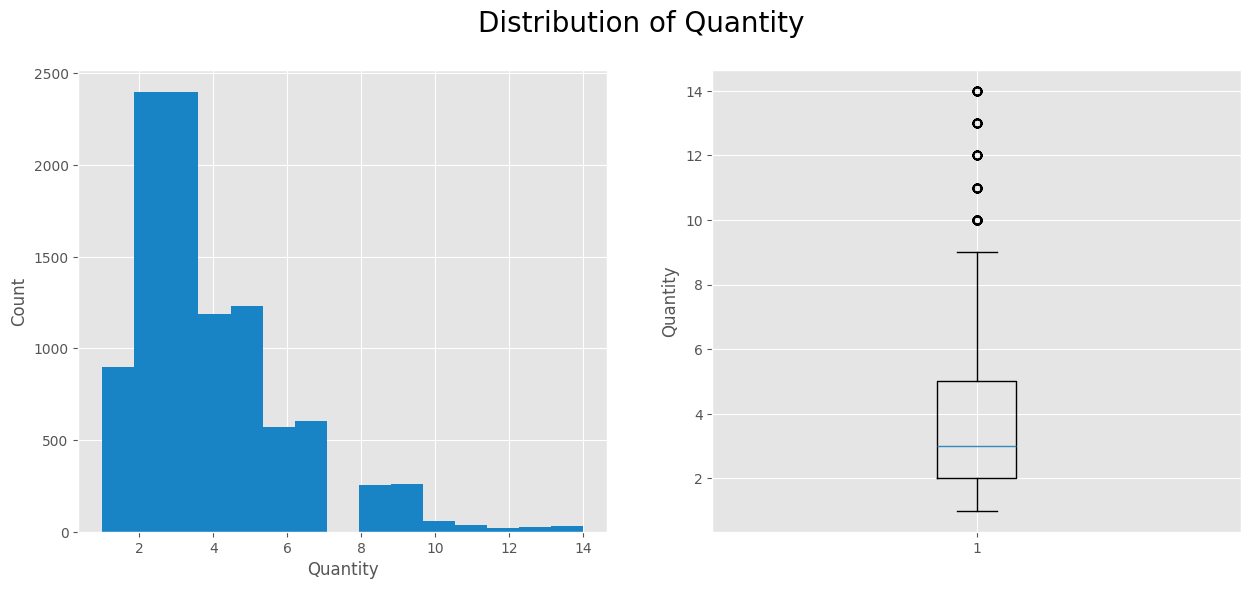

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Quantity'], bins=15, color='#1984c5')
ax1.set_ylabel('Count')
ax1.set_xlabel('Quantity')

ax2.boxplot(df_store['Quantity'])
ax2.set_ylabel('Quantity')

plt.suptitle('Distribution of Quantity', fontsize=20)
plt.show()

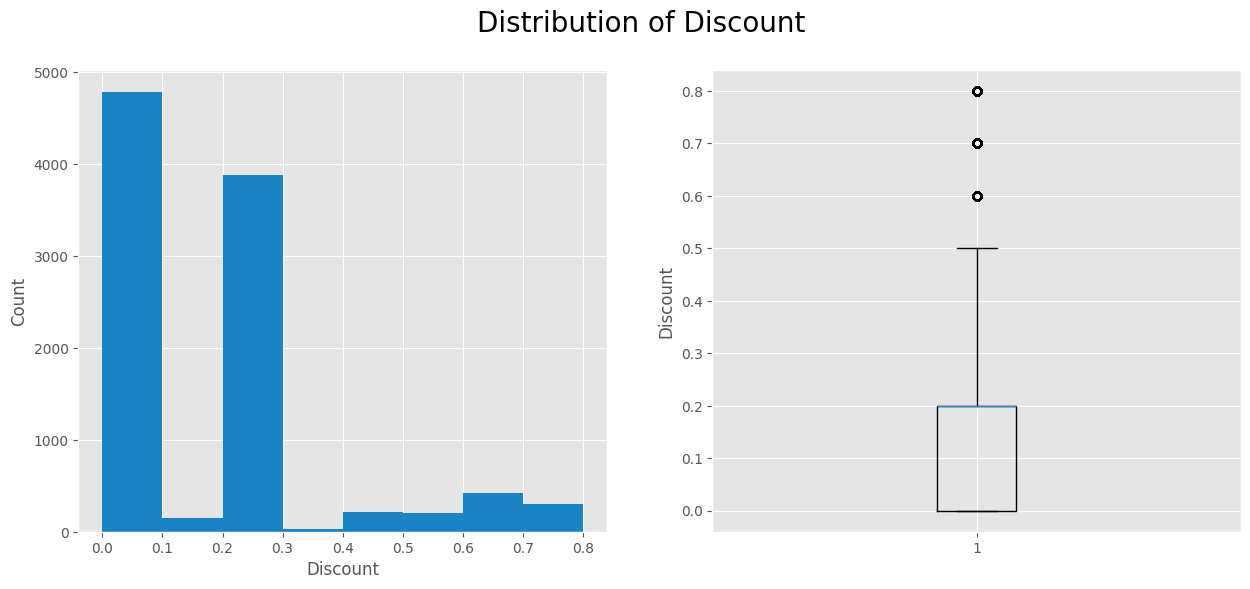

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Discount'], bins=8, color='#1984c5')
ax1.set_ylabel('Count')
ax1.set_xlabel('Discount')

ax2.boxplot(df_store['Discount'])
ax2.set_ylabel('Discount')

plt.suptitle('Distribution of Discount', fontsize=20)
plt.show()

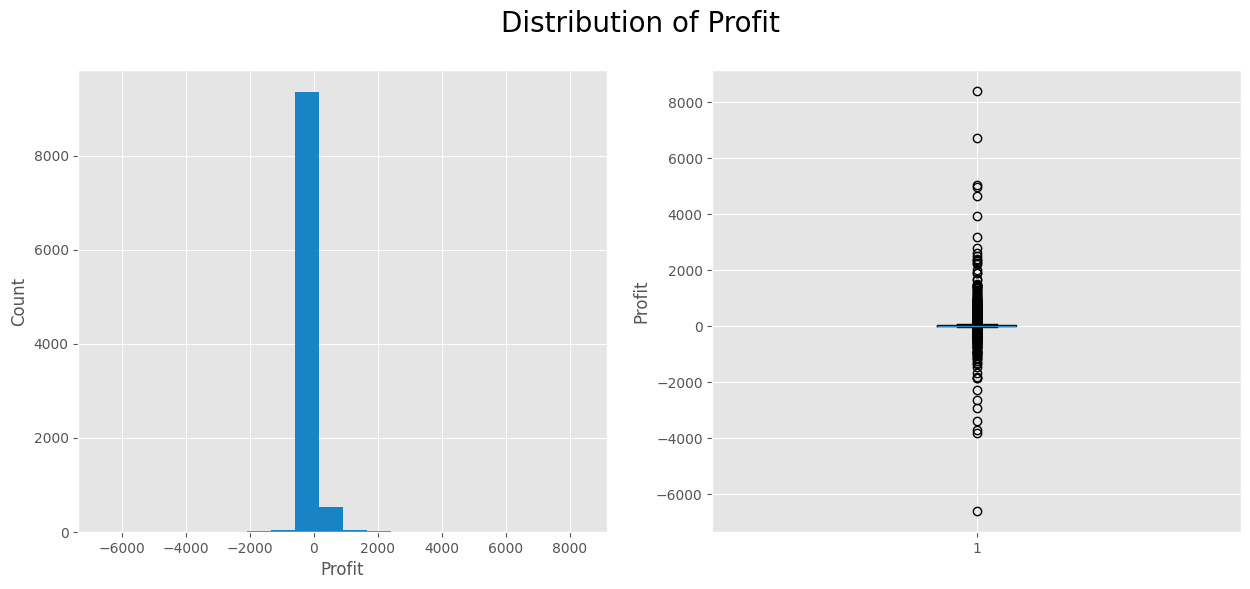

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Profit'], bins=20, color='#1984c5')
ax1.set_ylabel('Count')
ax1.set_xlabel('Profit')

ax2.boxplot(df_store['Profit'])
ax2.set_ylabel('Profit')

plt.suptitle('Distribution of Profit', fontsize=20)
plt.show()

#### Correlation

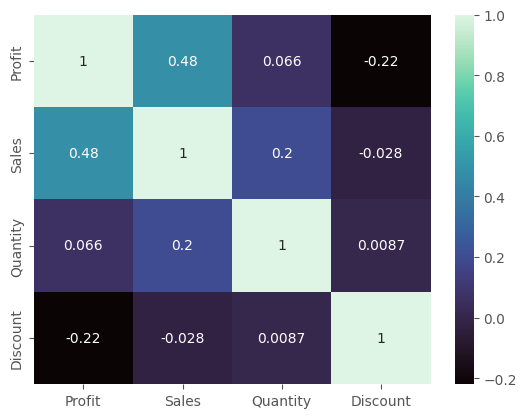

In [130]:
sns.heatmap(df_store[['Profit', 'Sales', 'Quantity', 'Discount']].corr(), annot=True, cmap=sns.color_palette('mako', as_cmap=True))
plt.show()

In [101]:
df_store

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200
